# 5.10 Coding Etiquette & Excel Reporting

### This script contains the following points:

### 1. Part 1 of Project 5

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
# Create folder path
path = r'C:\Users\Thor\OneDrive\Desktop\Career Foundry Tools\Projects\Project 5\09-01-2021 Instacart Basket Analysis'

# Question 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Loading All_merged.pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'All_merge.pkl'))

In [4]:
df.shape

(15956724, 30)

In [5]:
df.dtypes

order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_time_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                  float64
department_id             float64
prices                    float64
price_range_loc            object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
spending                  float64
spending_flag              object
frequency                 float64
frequency_flag             object
surname                    object
gender                     object
state                      object
age                         int64
date_joined                object
n_dependants                int64
fam_status                 object
income        

In [6]:
# Displayinh head to see fields
df.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,16.0,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Question 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


### Information such as Surname, Age, number of dependants, family status, and income are all PII and should be treated with proper security protocols. 

# Question 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
# Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [7]:
# Create column that divides states up into regions based on Wikipedia grouping (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)
region =[]

for state in df['state']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        region.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        region.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    else:
        region.append('West')

In [8]:
# Create region column
df['region'] = region

In [9]:
df['region'].value_counts()

South        5018251
West         4331741
Midwest      3744428
Northeast    2862304
Name: region, dtype: int64

In [10]:
# Check to make sure all states are properly labeled by checking value counts
5018251+4331741+3744428+2862304

15956724

In [11]:
# Check to make sure length of states matches region count
len(df['state'])

15956724

In [12]:
#Change dtype category
df['region'] = df['region'].astype('category')

In [13]:
# Creating crosstab of spending habits of different US regions
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,127116,3617312
Northeast,101065,2761239
South,189707,4828544
West,170483,4161258


In [15]:
# Check for high spending population percentage in Midwest
3617312+127116

3744428

In [16]:
Midwest=(127116/3744428)*100

In [17]:
Midwest

3.3948042264399265

In [18]:
# Check for high spending population percentage in Northeast
2761239+101065

2862304

In [19]:
Northeast= (101065/2862304)*100

In [20]:
Northeast

3.5308967880420807

In [21]:
# Check for high spending population percentage in South
4828544+189707

5018251

In [22]:
South = (189707/5018251)*100

In [23]:
South

3.7803409992844124

In [24]:
# Check for high spending population percentage in West
4161258+170483

4331741

In [25]:
West = (170483/4331741)*100

In [26]:
West

3.935669284013056

### All four regions have around the same high spender percentage. The West has the highest percentage at 3.9% while the Midwest has the lowest at 3.4%

# Question 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [27]:
# Creating a dataframe excluding customers with less than 5 orders

df_high = df[df['max_order'] >=5]

In [28]:
df_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [29]:
# Check to make sure new dataframe has no less than 5 orders
df_high['max_order'].min()

5

In [30]:
# Creating a dataframe for customers with less than 5 orders

df_low = df[df['max_order'] <5]

In [31]:
df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
64703,977610,114,2,0,8,6.0,39877,1,1,Organic Granny Smith Apple,...,Frequent customer,Weiss,Female,Hawaii,57,3/18/2020,2,married,104350,West
64704,977610,114,2,0,8,6.0,18465,2,1,Organic Grade A Free Range Large Brown Eggs,...,Frequent customer,Weiss,Female,Hawaii,57,3/18/2020,2,married,104350,West
64705,977610,114,2,0,8,6.0,40706,3,1,Organic Grape Tomatoes,...,Frequent customer,Weiss,Female,Hawaii,57,3/18/2020,2,married,104350,West
64706,977610,114,2,0,8,6.0,13176,4,1,Bag of Organic Bananas,...,Frequent customer,Weiss,Female,Hawaii,57,3/18/2020,2,married,104350,West
64707,977610,114,2,0,8,6.0,30391,5,1,Organic Cucumber,...,Frequent customer,Weiss,Female,Hawaii,57,3/18/2020,2,married,104350,West


In [32]:
# Checking to make sure low dataframe has no more than 4 max orders
df_low['max_order'].max()

4

# Question 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


In [33]:
# List of all potential variables
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_time_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
surname                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status          

In [34]:
# Creating crosstabs to find correlations between different segments of population
df_high['spending_flag'].value_counts()

Low Spender     15354066
High Spender      588213
Name: spending_flag, dtype: int64

In [35]:
crosstab_region_spending = pd.crosstab(df['age'], df['spending_flag'], dropna = False)

In [36]:
crosstab_region_spending

spending_flag,High Spender,Low Spender
age,,
18,9312,261823
19,6868,252587
20,7514,243039
21,9252,240372
22,6561,223588
...,...,...
77,4467,246529
78,12801,228635
79,7229,241616


In [37]:
#creating age groups based on Generations (Source: https://www.beresfordresearch.com/age-range-by-generation/)
df_high.loc[df_high['age'] < 24, 'Generation'] = 'Gen_Z'
df_high.loc[(df_high['age'] >= 25) & (df_high['age'] <= 40), 'Generation'] = 'Millennials'
df_high.loc[(df_high['age'] >= 41) & (df_high['age'] <= 56), 'Generation'] = 'Gen_X'
df_high.loc[(df_high['age'] >= 57) & (df_high['age'] <= 66), 'Generation'] = 'Boomers_II'
df_high.loc[(df_high['age'] >= 67) & (df_high['age'] <= 75), 'Generation'] = 'Boomers_I'
df_high.loc[(df_high['age'] >= 76) & (df_high['age'] <= 93), 'Generation'] = 'Post_War'
df_high.loc[df_high['age'] >= 94, 'Generation'] = 'WW_II'

C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [38]:
df_high['Generation'].value_counts()

Millennials    4009304
Gen_X          3968579
Boomers_II     2462968
Boomers_I      2218387
Gen_Z          1522235
Post_War       1519167
Name: Generation, dtype: int64

In [39]:
# Verifing proper attachment
len(df_high['Generation'])

15942279

In [40]:
len(df_high['age'])

15942279

In [41]:
# Create Crosstab between generations and spending flags
crosstab_generation_spending = pd.crosstab(df_high['Generation'], df_high['spending_flag'], dropna = False)

In [42]:
crosstab_generation_spending

spending_flag,High Spender,Low Spender
Generation,,
Boomers_I,86712,2131675
Boomers_II,93543,2369425
Gen_X,155662,3812917
Gen_Z,46480,1475755
Millennials,146068,3863236
Post_War,57150,1462017


In [43]:
# Export crosstab to Excel
crosstab_generation_spending.to_clipboard()

In [44]:
# Exploring correlation with regards to family status
df_high['fam_status'].value_counts()

married                             11209898
single                               2581746
divorced/widowed                     1358981
living with parents and siblings      791654
Name: fam_status, dtype: int64

In [45]:
crosstab_fam_generation = pd.crosstab(df_high['Generation'], df_high['fam_status'], dropna = False)

In [46]:
crosstab_fam_generation

fam_status,divorced/widowed,living with parents and siblings,married,single
Generation,,,,
Boomers_I,538463,0,1679924,0
Boomers_II,425048,0,1854435,183485
Gen_X,0,0,3000859,967720
Gen_Z,0,791654,365708,364873
Millennials,0,0,3001540,1007764
Post_War,395470,0,1123697,0


In [47]:
crosstab_fam_generation.to_clipboard()

In [48]:
# Exploring correlation between generations and deparment ID 
crosstab_gen_dept = pd.crosstab(df_high['Generation'], df_high['department_id'], dropna = False)

In [49]:
crosstab_gen_dept

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Generation,,,,,,,,,,,,,,,,,,,,,
Boomers_I,155721,2259,80664,647203,9167,18619,182423,7274,59314,2294,...,49163,128678,46785,73908,372093,49960,28059,195186,72027,4757
Boomers_II,167909,2858,89071,722465,10851,19806,206413,6981,65516,2600,...,53794,143246,52690,78607,410226,56352,33913,218638,79383,5609
Gen_X,269405,4354,142870,1165001,19292,32850,331295,12226,104677,4105,...,85670,228426,85686,129974,660525,90288,53242,354587,127111,8815
Gen_Z,102806,1841,54468,448571,7589,12603,122478,4836,39734,1615,...,33231,87535,33767,50004,259155,33866,20795,134500,47997,3169
Millennials,269268,4596,145719,1177214,18027,33557,330881,11472,107089,4393,...,86650,229614,86111,132780,673565,90182,52172,358432,130838,8456
Post_War,105178,1527,55679,443853,6521,12598,126320,4495,39916,1606,...,32653,85951,34433,49899,251972,34211,19172,137560,50677,3361


In [50]:
crosstab_gen_dept.to_clipboard()

In [51]:
# Exploring correlation between generations and number of dependents
crosstab_gen_ndep = pd.crosstab(df_high['Generation'], df_high['n_dependants'], dropna = False)
print(crosstab_gen_ndep)
crosstab_gen_ndep.to_clipboard()

n_dependants        0        1        2       3
Generation                                     
Boomers_I      538463   565098   546811  568015
Boomers_II     608533   610871   628655  614909
Gen_X          967720  1020576  1044349  935934
Gen_Z          364873   398832   376287  382243
Millennials   1007764  1013057  1005814  982669
Post_War       395470   357537   372604  393556


In [52]:
# Exploring correlation between generations and purchase days
crosstab_gen_day = pd.crosstab(df_high['Generation'], df_high['orders_day_of_week'], dropna = False)
print(crosstab_gen_day)
crosstab_gen_day.to_clipboard()

orders_day_of_week       0       1       2       3       4       5       6
Generation                                                                
Boomers_I           419736  388140  287345  266026  259734  291063  306343
Boomers_II          463030  428333  324468  292951  288655  329903  335628
Gen_X               752861  693937  515208  472497  465113  519157  549806
Gen_Z               285301  267490  199995  180881  180687  198654  209227
Millennials         767203  699391  518374  475724  469853  523135  555624
Post_War            290685  266413  198116  181015  176430  196733  209775


In [53]:
# Creating filter for income brackets

df_high.loc[df_high['income'] < 100000, 'income_range'] = '0 - 100k'
df_high.loc[(df_high['income'] >= 100000) & (df_high['income'] < 200000), 'income_range'] = '100-200k'
df_high.loc[(df_high['income'] >= 200000) & (df_high['income'] < 300000), 'income_range'] = '200-300k'
df_high.loc[(df_high['income'] >= 300000) & (df_high['income'] < 400000), 'income_range'] = '300-400k'
df_high.loc[(df_high['income'] >= 400000) & (df_high['income'] < 500000), 'income_range'] = '400-500k'
df_high.loc[df_high['income'] >= 500000, 'income_range'] = 'Over 500k'

C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [54]:
df_high['income_range'].value_counts()

0 - 100k     9085710
100-200k     6767862
200-300k       55906
300-400k       14702
400-500k       12066
Over 500k       6033
Name: income_range, dtype: int64

In [55]:
# Exploring correlation between generations and income
crosstab_gen_income = pd.crosstab(df_high['Generation'], df_high['income_range'], dropna = False)
print(crosstab_gen_income)
crosstab_gen_income.to_clipboard()

income_range  0 - 100k  100-200k  200-300k  300-400k  400-500k  Over 500k
Generation                                                               
Boomers_I       726918   1475750      7866      1494      4264       2095
Boomers_II      857653   1586339     10306      3726      3109       1835
Gen_X          1367303   2572953     20503      3354      2785       1681
Gen_Z          1475582     41353      2314      2986         0          0
Millennials    3904280     97628      4977      2419         0          0
Post_War        518156    988658      9812       211      1908        422


In [56]:
# Exploring correlation between department and income
crosstab_dep_income = pd.crosstab(df_high['income_range'], df_high['department_id'], dropna = False)
print(crosstab_dep_income)
crosstab_dep_income.to_clipboard()

department_id    1.0    2.0     3.0      4.0    5.0    6.0     7.0    8.0   \
income_range                                                                 
0 - 100k       614710  10634  328092  2653165  40072  74761  761144  27669   
100-200k       465486   7046  245510  2000502  31199  56378  551424  20173   
200-300k         4102     61    2150    14120    831    427    4307    238   
300-400k         1242     16     766     3469    120    116    1262     24   
400-500k          905     11     447     3009    321     95    1099     13   
Over 500k         438      9     284     1364     75     66     503      9   

department_id    9.0    10.0  ...    12.0    13.0    14.0    15.0     16.0  \
income_range                  ...                                            
0 - 100k       238256  10136  ...  194411  518798  198453  295167  1515288   
100-200k       181819   6703  ...  150271  393228  144052  224744  1136283   
200-300k         1548     24  ...    1079    3379    1484    20

In [57]:
# Exploring correlation between department and time of order
crosstab_dep_time = pd.crosstab(df_high['order_time_of_day'], df_high['department_id'], dropna = False)
print(crosstab_dep_time)
crosstab_dep_time.to_clipboard()

department_id       1.0   2.0    3.0     4.0   5.0    6.0     7.0   8.0   \
order_time_of_day                                                          
0                   7353   122   3592   32903   249    933    8244   344   
1                   4109    65   1754   16971   129    494    4725   200   
2                   2473    53   1052    9453    84    268    2999   122   
3                   1972    37    875    7027   102    239    2250   103   
4                   1974    24    947    7498    84    231    2267   120   
5                   3048    49   1527   12845   146    332    3667   136   
6                   9452   159   5472   42768   324   1077   11238   468   
7                  27793   435  16961  133813   957   3082   33765  1128   
8                  51410   890  31754  254932  2578   6164   69265  2092   
9                  71633  1346  44366  352361  4816   8981  108442  3331   
10                 82850  1445  48586  395174  6350  11080  120457  3800   
11          

In [58]:
# Exploring correlation between region and generation
crosstab_reg_gen = pd.crosstab(df_high['region'], df_high['Generation'], dropna = False)
print(crosstab_reg_gen)
crosstab_reg_gen.to_clipboard()

Generation  Boomers_I  Boomers_II    Gen_X   Gen_Z  Millennials  Post_War
region                                                                   
Midwest        501359      572971   903333  342209       989275    380200
Northeast      421638      455000   727693  253859       680227    273628
South          676658      767575  1231984  493325      1298934    461530
West           618732      667422  1105569  432842      1040868    403809


In [59]:
# Creating filter for parental status

df_high.loc[df_high['n_dependants'] > 0, 'parental_status'] = 'Parent'
df_high.loc[df_high['n_dependants'] <= 0, 'parental_status'] = 'Not Parent'

C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Thor\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [60]:
# Checking values of parental status flag
df_high['parental_status'].value_counts()

Parent        12001552
Not Parent     3940727
Name: parental_status, dtype: int64

In [61]:
# Exploring correlation between region and parental status
crosstab_reg_par = pd.crosstab(df_high['region'], df_high['parental_status'], dropna = False)
print(crosstab_reg_par)
crosstab_reg_par.to_clipboard()

parental_status  Not Parent   Parent
region                              
Midwest              940767  2800446
Northeast            718450  2141546
South               1212205  3801717
West                1069305  3257843


In [62]:
# Exploring correlation between parental status and generation
crosstab_gen_par = pd.crosstab(df_high['parental_status'], df_high['Generation'], dropna = False)
print(crosstab_gen_par)
crosstab_gen_par.to_clipboard()

Generation       Boomers_I  Boomers_II    Gen_X    Gen_Z  Millennials  \
parental_status                                                         
Not Parent          538463      608533   967720   364873      1007764   
Parent             1679924     1854435  3000859  1157362      3001540   

Generation       Post_War  
parental_status            
Not Parent         395470  
Parent            1123697  


In [63]:
# Exploring correlation between income range and frequency buying
crosstab_income_freq = pd.crosstab(df_high['income_range'], df_high['frequency_flag'], dropna = False)
print(crosstab_income_freq)
crosstab_income_freq.to_clipboard()

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_range                                                              
0 - 100k                  6677806                 366646           2041258
100-200k                  4968426                 254449           1544987
200-300k                    39409                   2366             14131
300-400k                    11766                    178              2758
400-500k                     8910                    302              2854
Over 500k                    3584                    157              2292


In [64]:
# Exploring correlation between income range and frequency buying
crosstab_income_reg = pd.crosstab(df_high['region'], df_high['income_range'], dropna = False)
print(crosstab_income_reg)
crosstab_income_reg.to_clipboard()

income_range  0 - 100k  100-200k  200-300k  300-400k  400-500k  Over 500k
region                                                                   
Midwest        2150304   1575781      7434      3191      3085       1418
Northeast      1592213   1253112     10673       647      1381       1970
South          2888982   2092150     23055      3528      3562       2645
West           2454211   1846819     14744      7336      4038          0


In [65]:
# Exploring correlation between gender and frequency buying
crosstab_dept_reg = pd.crosstab(df_high['department_id'], df_high['region'], dropna = False)
print(crosstab_dept_reg)
crosstab_dept_reg.to_clipboard()

region         Midwest  Northeast    South     West
department_id                                      
1.0             253627     194131   342097   297028
2.0               4128       3180     5553     4916
3.0             135754     102609   182702   156184
4.0            1094622     842958  1466867  1271182
5.0              17006      10634    23428    21550
6.0              31170      23438    41236    35999
7.0             311990     238271   416208   353270
8.0              12060       8656    14367    13043
9.0              99356      76396   131544   115329
10.0              4012       2947     5122     4794
11.0             51903      39117    68219    58533
12.0             79676      63224   108281    95394
13.0            213744     163576   291501   248711
14.0             82950      61107   108341    92250
15.0            123619      93991   163238   142344
16.0            623305     476918   839858   726637
17.0             86853      64639   113560    95424
18.0        

In [66]:
# Exploring correlation between income range and frequency buying

crosstab_tod_prange = pd.crosstab(df_high['order_time_of_day'], df_high['price_range_loc'], dropna = False)
print(crosstab_tod_prange)
crosstab_tod_prange.to_clipboard()

price_range_loc    High-range product  Low-range product  Mid-range product
order_time_of_day                                                          
0                                1308              32619              71025
1                                 680              17289              37336
2                                 428              10197              21947
3                                 317               7571              16981
4                                 356               7919              17394
5                                 569              13142              29152
6                                1897              44277              96860
7                                5876             136770             298934
8                               10764             266293             576527
9                               14612             383027             815041
10                              16426             429272             914416
11          

In [67]:
df_high_prod =  df_high[df_high['price_range_loc']=='High-range product']

In [68]:
# Exploring correlation between order time of day and price range

crosstab_tod_prange_high = pd.crosstab(df_high['order_time_of_day'], df_high_prod['price_range_loc'], dropna = False)
print(crosstab_tod_prange_high)
crosstab_tod_prange_high.to_clipboard()

price_range_loc    High-range product
order_time_of_day                    
0                                1308
1                                 680
2                                 428
3                                 317
4                                 356
5                                 569
6                                1897
7                                5876
8                               10764
9                               14612
10                              16426
11                              17399
12                              16956
13                              17170
14                              17242
15                              17344
16                              16280
17                              13038
18                              10392
19                               7564
20                               5965
21                               5023
22                               3865
23                               2411


In [69]:
# Exploring correlation between order day of week and price range

crosstab_dow_prange_high = pd.crosstab(df_high['orders_day_of_week'], df_high_prod['price_range_loc'], dropna = False)
print(crosstab_dow_prange_high)
crosstab_dow_prange_high.to_clipboard()

price_range_loc     High-range product
orders_day_of_week                    
0                                42581
1                                34185
2                                25293
3                                22542
4                                22582
5                                25551
6                                31148


In [70]:
# Exploring correlation between region and price range
crosstab_reg_pran = pd.crosstab(df_high['region'], df_high['price_range_loc'], dropna = False)
print(crosstab_reg_pran)
crosstab_reg_pran.to_clipboard()

price_range_loc  High-range product  Low-range product  Mid-range product
region                                                                   
Midwest                       46535            1170204            2521286
Northeast                     37203             891501            1928618
South                         63919            1565791            3379555
West                          56225            1345775            2921333


In [96]:
# Exploring correlation between Generation and loyalty
crosstab_gen_loyal = pd.crosstab(df_high['Generation'], df_high['loyalty_flag'], dropna = False)
print(crosstab_gen_loyal)
crosstab_gen_loyal.to_clipboard()

loyalty_flag  Loyal customer  New customer  Regular customer
Generation                                                  
Boomers_I            1026124         94060           1098203
Boomers_II           1092123        106287           1264558
Gen_X                1807150        164040           1997389
Gen_Z                 712550         64854            744831
Millennials          1843671        162637           2002996
Post_War              695350         67182            756635


In [105]:
# Exploring correlation between Parental status and Spending
crosstab_parent_price = pd.crosstab(df_high['price_range_loc'], df_high['parental_status'], dropna = False)
print(crosstab_parent_price)
crosstab_parent_price.to_clipboard()

parental_status     Not Parent   Parent
price_range_loc                        
High-range product       49554   154328
Low-range product      1233488  3739783
Mid-range product      2653887  8096905


In [113]:
# Exploring correlation between region and loyalty
crosstab_reg_loyal = pd.crosstab(df_high['region'], df_high['loyalty_flag'], dropna = False)
print(crosstab_reg_loyal)
crosstab_reg_loyal.to_clipboard()

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
Midwest              1711544        153464           1876205
Northeast            1328057        122866           1409073
South                2297750        203983           2512189
West                 1951954        191243           2183951


# Question 6: Create an appropriate visualization to show the distribution of profiles.

In [71]:
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_time_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
surname                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status          

In [72]:
# Crosstab for price_range and order TOD

crosstab_reg_par = pd.crosstab(df_high['order_time_of_day'], df_high['price_range_loc'], dropna = False)

In [73]:
crosstab_generation_spending

spending_flag,High Spender,Low Spender
Generation,,
Boomers_I,86712,2131675
Boomers_II,93543,2369425
Gen_X,155662,3812917
Gen_Z,46480,1475755
Millennials,146068,3863236
Post_War,57150,1462017


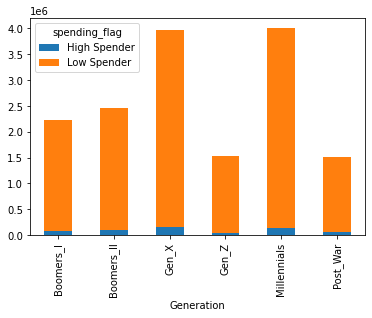

In [74]:
# Creating a bar chart of results sorted highest to lowest
crosstab_generation_spending_graph = crosstab_generation_spending.plot(kind='bar', stacked=True)

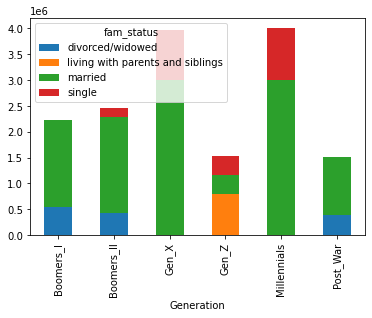

In [75]:
fam_generation_graph=crosstab_fam_generation.plot(kind='bar', stacked=True)

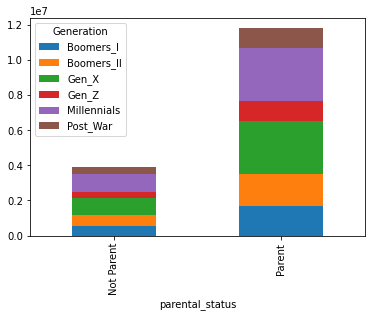

In [76]:
crosstab_gen_par_graph = crosstab_gen_par.plot(kind='bar', stacked=True)

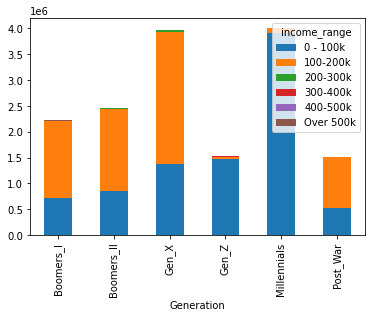

In [77]:
crosstab_gen_income_graph = crosstab_gen_income.plot(kind='bar', stacked=True)

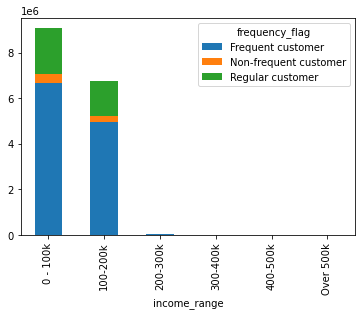

In [78]:
crosstab_income_freq_graph = crosstab_income_freq.plot(kind='bar', stacked=True)

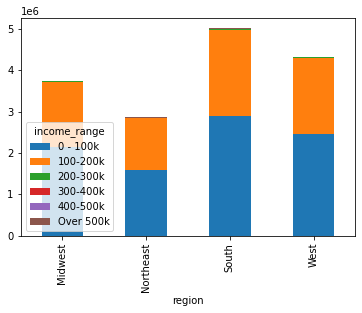

In [79]:
crosstab_income_reg_graph= crosstab_income_reg.plot(kind='bar', stacked=True)

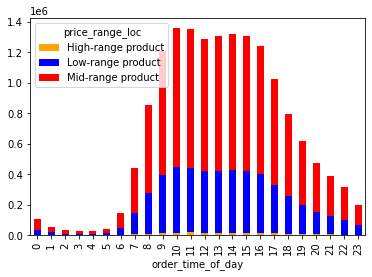

In [80]:
crosstab_tod_prange.plot = crosstab_tod_prange.plot.bar(stacked = True, color = ['orange', 'blue', 'red'])


In [81]:
# Exporting chart time of day/prices
crosstab_tod_prange.plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked time of day price range.png'))

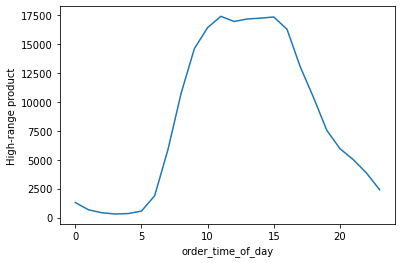

In [82]:
crosstab_tod_prange_high_line = sns.lineplot(data=crosstab_tod_prange_high, x = 'order_time_of_day', y='High-range product')

In [83]:
crosstab_tod_prange_high_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line high product sales.png'))

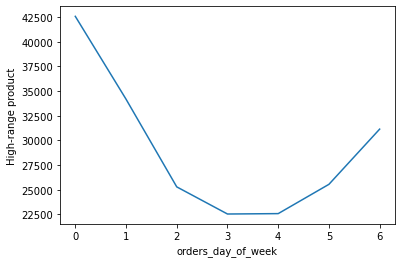

In [84]:
crosstab_dow_prange_high_line= sns.lineplot(data=crosstab_dow_prange_high, x = 'orders_day_of_week', y='High-range product')

In [85]:
crosstab_dow_prange_high_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line dow high item sale.png'))

In [86]:
# Creating a pie chart showing distrubution of price range products sold
df_high['price_range_loc'].value_counts()

Mid-range product     10750792
Low-range product      4973271
High-range product      203882
Name: price_range_loc, dtype: int64

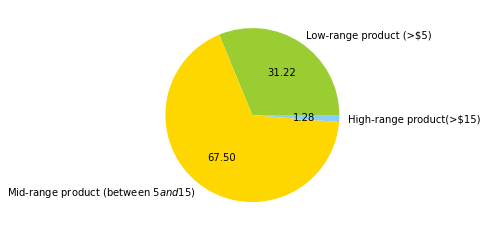

In [87]:
# Pie chart showing the distribution of products sold by price range
y = np.array([4973271, 10750792, 203882])
mylabels = ["Low-range product (>$5)", "Mid-range product (between $5 and $15)", "High-range product(>$15)"]
colors = ['yellowgreen', 'gold', 'lightskyblue']

plt.pie(y, labels = mylabels, colors=colors, autopct='%.2f')

plt.show() 

<AxesSubplot:xlabel='region'>

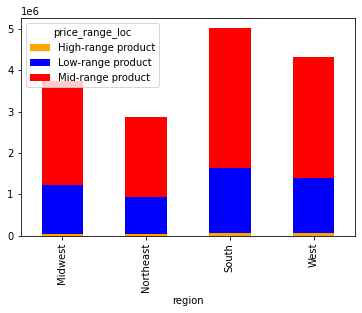

In [88]:
# Price purchases by region
crosstab_reg_pran.plot.bar(stacked = True, color = ['orange', 'blue', 'red'])

<AxesSubplot:>

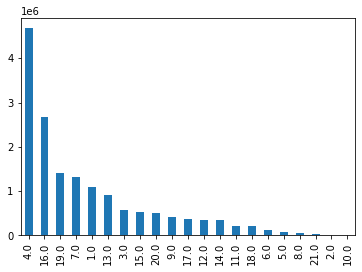

In [89]:
# Sales by department
df_high['department_id'].value_counts().plot.bar()

<AxesSubplot:>

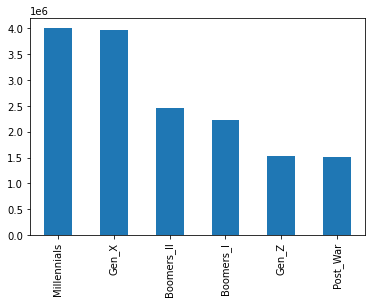

In [95]:
# A breakdown of our customers by generation
df_high['Generation'].value_counts().plot.bar()

<AxesSubplot:xlabel='Generation'>

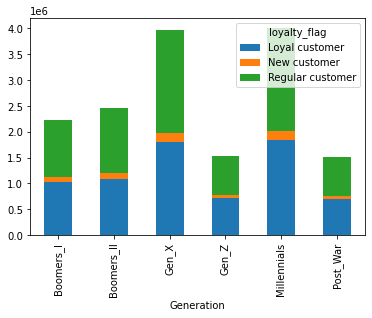

In [99]:
# Graph showing corralation between generation and loyalty
crosstab_gen_loyal.plot.bar(stacked=True)

<AxesSubplot:xlabel='price_range_loc'>

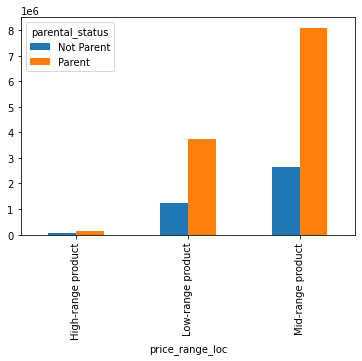

In [107]:
crosstab_parent_price.plot.bar()

<AxesSubplot:>

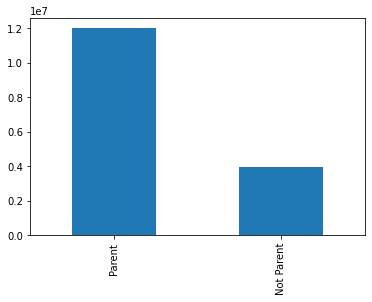

In [108]:
df_high['parental_status'].value_counts().plot.bar()

<AxesSubplot:>

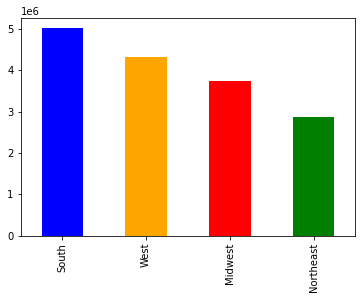

In [112]:
df_high['region'].value_counts().plot.bar(color = ['blue', 'orange', 'red', 'green'])

<AxesSubplot:xlabel='region'>

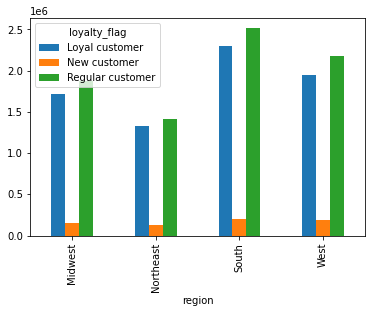

In [116]:
crosstab_reg_loyal.plot.bar()

# Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [90]:
df_high.groupby('Generation').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
Generation                      
Boomers_I    7.799040  1.0  25.0
Boomers_II   7.796563  1.0  25.0
Gen_X        7.793963  1.0  25.0
Gen_Z        7.803630  1.0  25.0
Millennials  7.791783  1.0  25.0
Post_War     7.777124  1.0  25.0

In [91]:
df_high.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_range                     
0 - 100k      7.754052  1.0  25.0
100-200k      7.846839  1.0  25.0
200-300k      7.736479  1.0  25.0
300-400k      7.775227  1.0  25.0
400-500k      7.852087  1.0  25.0
Over 500k     7.919310  1.0  25.0

In [92]:
df_high.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
parental_status                     
Not Parent       7.782661  1.0  25.0
Parent           7.797108  1.0  25.0

In [93]:
df_high.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.786521  1.0  25.0
Northeast  7.794797  1.0  25.0
South      7.789857  1.0  25.0
West       7.803036  1.0  25.0

# Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Graphs and comparisons shown in attached Excel spreadsheet

# Question 9: Produce suitable charts to illustrate your results and export them in your project folder.

### Graphs and comparisons shown in attached Excel spreadsheet

# Question 10: Tidy up your script, export your final data set, and save your notebook.